In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
df = pd.read_csv('emnist-balanced-train.csv')

In [3]:
X = df.iloc[:10000, 1:].values
y = df.iloc[:10000, 0].values
X.shape ,y.shape

((10000, 784), (10000,))

In [4]:
from sklearn.model_selection import train_test_split

num_classes = len(np.unique(y))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train = X_train.astype('float32') / 255.0
#X_val = X_val.astype('float32') / 255.0

X_train = X_train.reshape((-1, 28, 28, 1)).astype('uint8')
X_val = X_val.reshape((-1, 28, 28, 1)).astype('uint8')

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes+1)
y_val = tf.keras.utils.to_categorical(y_val, num_classes+1)

X_train.shape ,y_train.shape

((8000, 28, 28, 1), (8000, 48))

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

def resize(image):
    img = array_to_img(image, scale=False)
    img = img.resize((32, 32))
    img = img.convert(mode='RGB')
    arr = img_to_array(img)
    return arr.astype(np.float64)

In [6]:
X_train_resized = [resize(img) for img in X_train]
X_train_resized = np.array(X_train_resized)
X_train_resized.shape

(8000, 32, 32, 3)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = image_gen.flow(X_train_resized, y_train, batch_size=32, shuffle=True, subset='training')

valid_generator = image_gen.flow(X_train_resized, y_train, batch_size=32, shuffle=True, subset='validation')

(32, 32, 32, 3)
(32, 48)


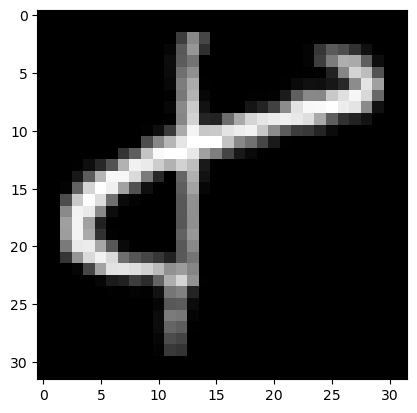

In [8]:
a, b = train_generator[0]
print(a.shape)
print(b.shape)
plt.imshow(a[0])

In [26]:
from tensorflow.keras.applications.resnet50 import ResNet50
model = models.Sequential()

model.add(ResNet50(input_shape = (32, 32, 3), include_top = False, pooling = 'avg', weights = None))
model.add(layers.Flatten())
model.add(Dense(48, activation = 'softmax'))

In [27]:
model.compile(optimizer=Adam(learning_rate=5e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(train_generator,epochs=20,validation_data=valid_generator)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 228s 763ms/step - accuracy: 0.1337 - loss: 4.6358 - val_accuracy: 0.0306 - val_loss: 4.7925
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 141s 703ms/step - accuracy: 0.5426 - loss: 1.6854 - val_accuracy: 0.1956 - val_loss: 3.3087
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 141s 705ms/step - accuracy: 0.6945 - loss: 1.0792 - val_accuracy: 0.4606 - val_loss: 2.6358
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 147s 737ms/step - accuracy: 0.7664 - loss: 0.8026 - val_accuracy: 0.6075 - val_loss: 1.6375
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 145s 726ms/step - accuracy: 0.7911 - loss: 0.7184 - val_accuracy: 0.5919 - val_loss: 2.5630
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 144s 722ms/step - accuracy: 0.8191 - loss: 0.6162 - val_accuracy: 0.6444 - val_loss: 1.6427
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 144s 721ms/step - accuracy: 0.8438 - loss: 0.4889 - val_accuracy: 0.6581 - val_loss: 1.5343
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 145s 724ms/step - accuracy: 0.8253 -

In [12]:
model.save('PreTrainedResNet50.h5')
model.save('PreTrainedResNet50.keras')
model.save_weights('PreTrainedResNet50.weights.h5')